In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score

import os

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m-%d-%H_%M_%S')
    return os.path.join(os.path.join(os.curdir,'my_logs'), run_id)

# Exercise 8

### A & B) Regular DNN

##### Read in Data

In [3]:
(X_tfull,y_tfull) , (X_test,y_test) = keras.datasets.cifar10.load_data()

X_train = X_tfull[5000:]
y_train = y_tfull[5000:]
X_val = X_tfull[:5000]
y_val = y_tfull[:5000]

print('Feature shape: ' + str(X_train.shape))
print('Label shape: ' + str(y_train.shape))
print('Number of labels: ' + str(len(np.unique(y_train))))

Feature shape: (45000, 32, 32, 3)
Label shape: (45000, 1)
Number of labels: 10


##### Create Model and Define Loss and Optimizer

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (32,32,3),name = 'flat_in'))

for i in range(20): #add 20 layers
    model.add(keras.layers.Dense(100,activation = 'elu',name = f'dense_{i}',kernel_initializer = 'HeNormal'))

model.add(keras.layers.Dense(10,activation = 'softmax',name = 'dense_out'))

my_opt = keras.optimizers.Nadam(learning_rate = 5e-5)
model.compile(optimizer = my_opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

##### Define learning rate schedule and callbacks

In [8]:
def my_lr_schedule(epoch,lr):
    all_lrs = 10**np.linspace(-7,1.1,100,dtype = float)
    return all_lrs[epoch]

In [9]:
early_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
lr_schedule = keras.callbacks.LearningRateScheduler(my_lr_schedule)
save_cb = keras.callbacks.ModelCheckpoint('my_cifar10_lr_search.h5',save_best_only=True)
tb_cb = keras.callbacks.TensorBoard(get_run_logdir(),)


history = model.fit(X_train,y_train,epochs = 100, validation_data = (X_val,y_val),callbacks = [early_cb,save_cb,tb_cb,lr_schedule])

Epoch 1/100
1407/1407 [==============================] - 26s 14ms/step - loss: 116.8075 - accuracy: 0.0931 - val_loss: 74.7765 - val_accuracy: 0.0908 - lr: 1.0000e-07
Epoch 2/100
1407/1407 [==============================] - 19s 13ms/step - loss: 62.5933 - accuracy: 0.0960 - val_loss: 50.2995 - val_accuracy: 0.1044 - lr: 1.2073e-07
Epoch 3/100
1407/1407 [==============================] - 19s 14ms/step - loss: 44.0928 - accuracy: 0.1021 - val_loss: 36.9694 - val_accuracy: 0.1130 - lr: 1.4576e-07
Epoch 4/100
1407/1407 [==============================] - 20s 14ms/step - loss: 32.9147 - accuracy: 0.1024 - val_loss: 27.9838 - val_accuracy: 0.1104 - lr: 1.7598e-07
Epoch 5/100
1407/1407 [==============================] - 19s 14ms/step - loss: 25.2135 - accuracy: 0.1077 - val_loss: 21.5021 - val_accuracy: 0.1130 - lr: 2.1246e-07
Epoch 6/100
1407/1407 [==============================] - 19s 14ms/step - loss: 19.1507 - accuracy: 0.1092 - val_loss: 16.2803 - val_accuracy: 0.1114 - lr: 2.5650e-07
Epo

In [12]:
df = pd.DataFrame(history.history)


Text(0.5, 1.0, 'min loss: 0.00027312638121657073')

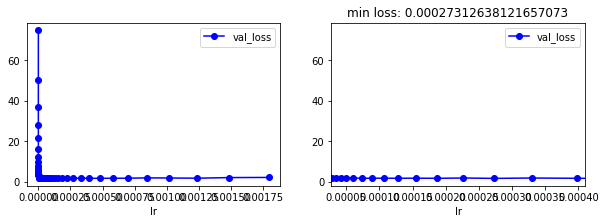

In [28]:
fig,ax = plt.subplots(ncols = 2, figsize = (10,3))

df.plot(x = 'lr',y = 'val_loss',color = 'b',marker= 'o',ax = ax[0])

min_loss = np.argmin(df['val_loss'])
min_lr = df.loc[min_loss,'lr']

df.plot(x = 'lr',y = 'val_loss',color = 'b', marker = 'o',ax = ax[1]); plt.xlim([min_lr*.1 , min_lr*1.5]); plt.title(f'min loss: {min_lr}')




#### Training on optimum learning level (10X than the minimum above)

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (32,32,3),name = 'flat_in'))

for i in range(20): #add 20 layers
    model.add(keras.layers.Dense(100,activation = 'elu',name = f'dense_{i}',kernel_initializer = 'HeNormal'))

model.add(keras.layers.Dense(10,activation = 'softmax',name = 'dense_out'))

my_opt = keras.optimizers.Nadam(learning_rate = 2.7e-5)
model.compile(optimizer = my_opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [30]:
early_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
save_cb = keras.callbacks.ModelCheckpoint('my_cifar10_default.h5',save_best_only=True)
tb_cb = keras.callbacks.TensorBoard(get_run_logdir(),)


history = model.fit(X_train,y_train,epochs = 100, validation_data = (X_val,y_val),callbacks = [early_cb,save_cb,tb_cb])

Epoch 1/100
1407/1407 [==============================] - 22s 12ms/step - loss: 5.0479 - accuracy: 0.1501 - val_loss: 2.3078 - val_accuracy: 0.1884
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.1542 - accuracy: 0.2184 - val_loss: 2.3808 - val_accuracy: 0.1954
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.0171 - accuracy: 0.2611 - val_loss: 2.1486 - val_accuracy: 0.2292
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.9243 - accuracy: 0.2953 - val_loss: 1.8959 - val_accuracy: 0.3148
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8575 - accuracy: 0.3246 - val_loss: 1.8502 - val_accuracy: 0.3190
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8040 - accuracy: 0.3462 - val_loss: 1.8170 - val_accuracy: 0.3342
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7596 - accuracy: 0.3624 - val_loss: 1

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5159 - accuracy: 0.4664


[1.515872836112976, 0.46639999747276306]

## C) With Batch Normalization

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (32,32,3),name = 'flat_in'))
model.add(keras.layers.BatchNormalization())

for i in range(20): #add 20 layers
    model.add(keras.layers.Dense(100,name = f'dense_{i}',kernel_initializer = 'HeNormal'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))

model.add(keras.layers.Dense(10,activation = 'softmax',name = 'dense_out'))

my_opt = keras.optimizers.Nadam(learning_rate = 5e-5)
model.compile(optimizer = my_opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [47]:
early_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
save_cb = keras.callbacks.ModelCheckpoint('my_cifar10_batch_norm.h5',save_best_only=True)
tb_cb = keras.callbacks.TensorBoard(get_run_logdir(),)


history = model.fit(X_train,y_train,epochs = 100, validation_data = (X_val,y_val),callbacks = [early_cb,save_cb,tb_cb])

Epoch 1/100
1407/1407 [==============================] - 42s 21ms/step - loss: 2.0398 - accuracy: 0.2678 - val_loss: 1.7597 - val_accuracy: 0.3670
Epoch 2/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.7857 - accuracy: 0.3593 - val_loss: 1.6486 - val_accuracy: 0.4146
Epoch 3/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6949 - accuracy: 0.3952 - val_loss: 1.6025 - val_accuracy: 0.4254
Epoch 4/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6384 - accuracy: 0.4168 - val_loss: 1.5427 - val_accuracy: 0.4510
Epoch 5/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5954 - accuracy: 0.4309 - val_loss: 1.4998 - val_accuracy: 0.4638
Epoch 6/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5569 - accuracy: 0.4459 - val_loss: 1.4819 - val_accuracy: 0.4746
Epoch 7/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5255 - accuracy: 0.4574 - val_loss: 1

In [48]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3625 - accuracy: 0.5175


[1.362518072128296, 0.5174999833106995]

## D) SELU instead of Batch Normalization

Normalize the datasets for SELU implementation

In [35]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)

X_train_selu = (X_train - X_mean)/X_std

X_val_selu = (X_val - X_mean)/X_std

X_test_selu = (X_test - X_mean)/X_std


In [36]:
init_lecun = tf.keras.initializers.LecunUniform()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (32,32,3),name = 'flat_in'))

for i in range(20): #add 20 layers
    model.add(keras.layers.Dense(100,activation = 'elu',name = f'dense_{i}',kernel_initializer = init_lecun))

model.add(keras.layers.Dense(10,activation = 'softmax',name = 'dense_out'))

my_opt = keras.optimizers.Nadam(learning_rate = 5e-5)
model.compile(optimizer = my_opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [37]:
early_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
save_cb = keras.callbacks.ModelCheckpoint('my_cifar10_SELU.h5',save_best_only=True)
tb_cb = keras.callbacks.TensorBoard(get_run_logdir(),)


history = model.fit(X_train_selu,y_train,epochs = 100, validation_data = (X_val_selu,y_val),callbacks = [early_cb,save_cb,tb_cb])

Epoch 1/100
1407/1407 [==============================] - 22s 12ms/step - loss: 1.7343 - accuracy: 0.3767 - val_loss: 1.5817 - val_accuracy: 0.4322
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5036 - accuracy: 0.4652 - val_loss: 1.5100 - val_accuracy: 0.4584
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4074 - accuracy: 0.4987 - val_loss: 1.4715 - val_accuracy: 0.4768
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3417 - accuracy: 0.5250 - val_loss: 1.4399 - val_accuracy: 0.4944
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2868 - accuracy: 0.5439 - val_loss: 1.4114 - val_accuracy: 0.5006
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2403 - accuracy: 0.5626 - val_loss: 1.4274 - val_accuracy: 0.4972
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1995 - accuracy: 0.5742 - val_loss: 1

In [38]:
model.evaluate(X_test_selu,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4081 - accuracy: 0.5043


[1.408065676689148, 0.5042999982833862]

## E) Drop out

#### i. Alpha Drop out

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (32,32,3),name = 'flat_in'))
model.add(keras.layers.BatchNormalization())

for i in range(20): #add 20 layers
    model.add(keras.layers.Dense(100,name = f'dense_{i}',kernel_initializer = 'HeNormal'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))

model.add(keras.layers.AlphaDropout(0.1,seed = 42,name = f'drop_{i}'))
model.add(keras.layers.Dense(10,activation = 'softmax',name = 'dense_out'))

my_opt = keras.optimizers.Nadam(learning_rate = 5e-5)
model.compile(optimizer = my_opt, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [50]:
early_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
save_cb = keras.callbacks.ModelCheckpoint('my_cifar10_alpha_drop.h5',save_best_only=True)
tb_cb = keras.callbacks.TensorBoard(get_run_logdir(),)


history = model.fit(X_train,y_train,epochs = 100, validation_data = (X_val,y_val),callbacks = [early_cb,save_cb,tb_cb])

Epoch 1/100
1407/1407 [==============================] - 41s 20ms/step - loss: 2.2367 - accuracy: 0.2325 - val_loss: 1.7517 - val_accuracy: 0.3688
Epoch 2/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.9578 - accuracy: 0.3185 - val_loss: 1.6442 - val_accuracy: 0.4148
Epoch 3/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.8501 - accuracy: 0.3557 - val_loss: 1.5829 - val_accuracy: 0.4446
Epoch 4/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.7759 - accuracy: 0.3816 - val_loss: 1.5484 - val_accuracy: 0.4562
Epoch 5/100
1407/1407 [==============================] - 26s 19ms/step - loss: 1.7152 - accuracy: 0.3997 - val_loss: 1.5022 - val_accuracy: 0.4686
Epoch 6/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6684 - accuracy: 0.4166 - val_loss: 1.4924 - val_accuracy: 0.4716
Epoch 7/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6271 - accuracy: 0.4305 - val_loss: 1

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.4063 - accuracy: 0.5147


[1.4062851667404175, 0.5146999955177307]

#### ii. MC Drop out

In [80]:
y_probas = np.stack([model(X_test,training = True) for _ in range(100)])
y_preds = np.argmax(y_probas.mean(axis=0),axis=1)
accuracy_score(y_preds,y_test)


0.5184

## F) 1cycle Training Schedule